In [123]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
salaries = pd.read_csv('Desktop/Data Analyst Portfolio/Datasets/salary_data_cleaned.csv')

In [7]:
print(salaries.head())

                   Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Cl

In [102]:
print(salaries['Salary Estimate'].isna().sum())

0


In [25]:
salaries['Salary Estimate'] = salaries['Salary Estimate'].apply(lambda x: x.split("(")[0].strip())


In [36]:
print(salaries['Salary Estimate'])

0       $53K-$91K
1      $63K-$112K
2       $80K-$90K
3       $56K-$97K
4      $86K-$143K
          ...    
737    $58K-$111K
738    $72K-$133K
739     $56K-$91K
740    $95K-$160K
741    $61K-$126K
Name: Salary Estimate, Length: 742, dtype: object


In [37]:
salaries['Salary Min Estimate'] = salaries['Salary Estimate'].str.extract(r'\$(\d+)K')[0]

In [89]:
print(salaries['Salary Estimate'].dtype)

object


In [90]:
salaries['Salary Min Estimate'] = salaries['Salary Min Estimate'].astype(int)

In [91]:
print(salaries['Salary Min Estimate'])

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: Salary Min Estimate, Length: 742, dtype: int32


In [92]:
print(salaries['Salary Min Estimate'].mean())

73.4177897574124


<Axes: xlabel='Salary Min Estimate', ylabel='Count'>

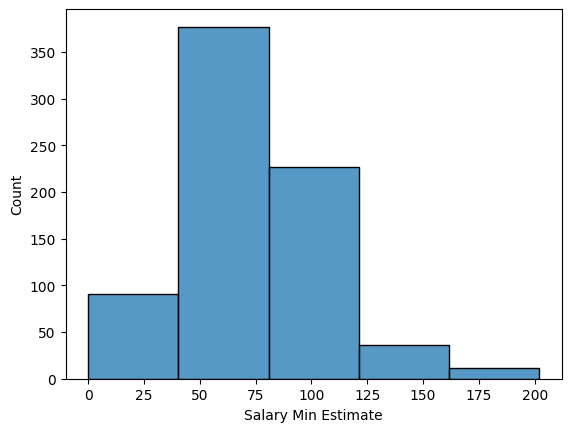

In [93]:
sns.histplot(salaries['Salary Min Estimate'], bins = 5)

In [86]:
salaries['Salary Max Estimate'] = salaries['Salary Estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')[1]

In [88]:
print(salaries['Salary Max Estimate'])

0       91.0
1      112.0
2       90.0
3       97.0
4      143.0
       ...  
737    111.0
738    133.0
739     91.0
740    160.0
741    126.0
Name: Salary Max Estimate, Length: 742, dtype: float64


In [96]:
salaries['Salary Min Estimate'] = pd.to_numeric(salaries['Salary Min Estimate'], errors='coerce')

In [99]:
salaries['Salary Max Estimate'] = salaries['Salary Max Estimate'].fillna(0).astype(int)

In [103]:
print(salaries['Salary Max Estimate'])

0       91
1      112
2       90
3       97
4      143
      ... 
737    111
738    133
739     91
740    160
741    126
Name: Salary Max Estimate, Length: 742, dtype: int32


In [105]:
print(salaries['Salary Max Estimate'].median())

124.0


In [106]:
print(salaries['Salary Max Estimate'].mean())

126.21698113207547


<Axes: xlabel='Salary Max Estimate', ylabel='Count'>

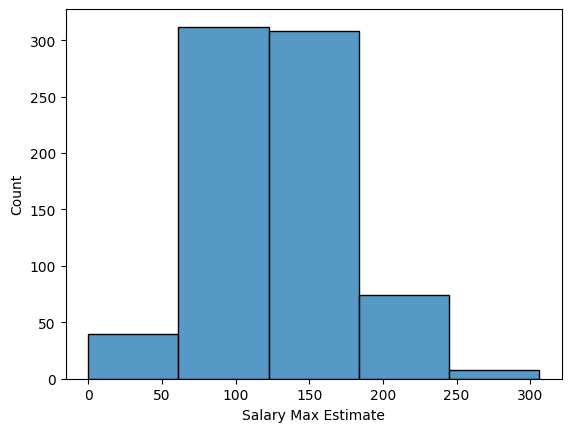

In [111]:
sns.histplot(salaries['Salary Max Estimate'], bins = 5)

In [108]:
max_plus_min_estimate = salaries['Salary Max Estimate'].mean() + salaries['Salary Min Estimate'].mean()

In [109]:
mean_max_min_estimate = max_plus_min_estimate / 2

In [110]:
print(mean_max_min_estimate)

99.81738544474393


In [112]:
salaries['Salaries Mean Estimate'] = salaries.apply(lambda row: (row['Salary Max Estimate'] + row['Salary Min Estimate']) / 2, axis=1)

In [129]:
mean_salary = salaries['Salaries Mean Estimate'].mean()
print(mean_salary)

99.81738544474393


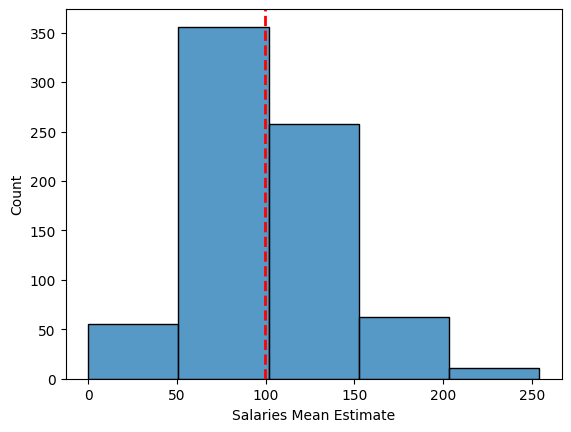

In [128]:
sns.histplot(salaries['Salaries Mean Estimate'], bins = 5)
plt.axvline(x=99.81738544474393, color='red', linestyle='dashed', linewidth=2, label='Value 99')
plt.show()